### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import urllib.request as url 
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import string

In [2]:
firstTest = pd.read_csv('firstf_test.csv', encoding = 'unicode_escape')

In [3]:
firstTest.tail()

,Unnamed: 0,id,ticker,cik,filing_date,X10k_link,tenk_data
425,426,425,AZO,866787,10/22/2012,https://www.sec.gov/Archives/edgar/data/866787...,Table of Contents UNITED STATES SECURITIES AN...
426,427,426,HBAN,49196,3/20/2003,https://www.sec.gov/Archives/edgar/data/49196/...,SECURITIES AND EXCHANGE COMMISSION WASHINGTON...
427,428,427,FE,1031296,2/27/2014,https://www.sec.gov/Archives/edgar/data/103129...,\t \t UNITED STATES SECURITIES AND EXCHANGE C...
428,429,428,PFE,78003,2/23/2017,https://www.sec.gov/Archives/edgar/data/78003/...,\t \t (Mark One) x ANNUAL REPORT PURSUANT TO ...
429,430,429,MAT,63276,3/22/1995,https://www.sec.gov/Archives/edgar/data/63276/...,=============================================...


How many most common words to print: 50

OK. The 50 most common words are as follows

the :  1059789
of :  851247
and :  768634
to :  512823
in :  469471
for :  234290
a :  227735
$ :  221607
as :  177520
on :  171133
our :  167058
or :  137545
) :  137301
by :  133368
are :  129065
company :  123111
million :  119294
is :  116266
with :  108514
that :  106559
other :  100309
we :  99054
financial :  97006
from :  92918
december :  88902
31 :  87827
s :  84616
at :  82724
net :  80181
income :  76240
be :  72937
which :  65988
an :  59620
not :  57514
assets :  57253
stock :  56076
these :  55688
cash :  54988
value :  54738
its :  54400
have :  51503
may :  51011
was :  50775
operations :  48971
tax :  48538
interest :  48200
under :  47871
year :  47022
consolidated :  46749
 :  46718


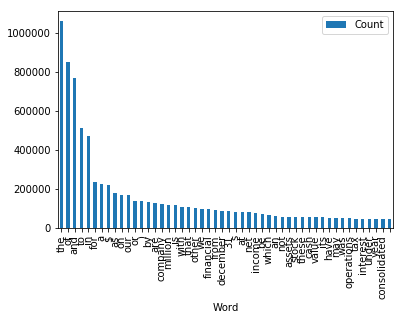

In [4]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

file = open('firstf_test.csv', encoding = 'unicode_escape')
a= file.read()         
            
# Stopwords
stopwords = set(line.strip() for line in open('firstf_test.csv'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lsthalfTest = word_counter.most_common(n_print)
df1sthalftest = pd.DataFrame(lsthalfTest, columns = ['Word', 'Count'])
df1sthalftest.plot.bar(x='Word',y='Count')

In [5]:
secondTest = pd.read_csv('secondtf_test.csv', encoding = 'unicode_escape')


In [6]:
secondTest.tail()

,Unnamed: 0,id,ticker,cik,filing_date,X10k_link,tenk_data
421,852,851,UTX,101829,2/6/2014,https://www.sec.gov/Archives/edgar/data/101829...,\t \t Table of Contents UNITED STATES SECURIT...
422,853,852,MRO,101778,3/10/2005,https://www.sec.gov/Archives/edgar/data/101778...,Use these links to rapidly review the documen...
423,854,853,KIM,879101,2/27/2013,https://www.sec.gov/Archives/edgar/data/879101...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...
424,855,854,SYMC,849399,5/21/2012,https://www.sec.gov/Archives/edgar/data/849399...,Table of Contents UNITED STATES SECURITIES AN...
425,856,855,MAT,63276,2/24/2011,https://www.sec.gov/Archives/edgar/data/63276/...,Table of Contents UNITED STATES SECURITIES AN...


In [7]:
dfTest = pd.concat([firstTest,secondTest])

In [8]:
dfTest.shape

(856, 7)

## Data Preprocessing

Drop the columns ticker and Unnamed: 0. 

Ticker and cik are both indicative of the company name, so we drop ticker.

In [9]:
dfTest = dfTest.drop(columns = ['ticker', 'Unnamed: 0'])

In [10]:
dfTest.head()

,id,cik,filing_date,X10k_link,tenk_data
0,0,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,Table of Contents UNITED STATES SECURITIES AN...
1,1,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...
2,2,315852,3/6/2001,https://www.sec.gov/Archives/edgar/data/315852...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...
3,3,920148,2/26/2009,https://www.sec.gov/Archives/edgar/data/920148...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...
4,4,96021,9/16/2004,https://www.sec.gov/Archives/edgar/data/96021/...,- -------------------------------------------...


In [11]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_punctuation(text):
    for c in string.punctuation:
        text = text.replace(c,"")
    return text
  
def remove_digits(text):
    return re.sub('[\d%/$]', '', text)
  
def to_upper_case(text):
    text = text.upper()
    return text
  
def remove_extra_hyphens(text):
    text = re.sub('-+', ' ', text)
    return text

In [12]:
def clean_text(text):
    text = remove_accented_chars(text).replace('\\n', '').replace('\t', '')
    text = remove_digits(text)
    text =  remove_extra_hyphens(text)
    text = remove_punctuation(text)
    text = to_upper_case(text)
    #text = text.replace('\\n', '').replace('\\t', '')
    return text

In [13]:
cleaned_data_list = []
for i in dfTest['tenk_data']:
    cleaned_data_list.append(clean_text(i))

In [14]:
dfTest['cleaned_data'] = cleaned_data_list

In [15]:
dfTest.head()

,id,cik,filing_date,X10k_link,tenk_data,cleaned_data
0,0,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...
1,1,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...
2,2,315852,3/6/2001,https://www.sec.gov/Archives/edgar/data/315852...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...
3,3,920148,2/26/2009,https://www.sec.gov/Archives/edgar/data/920148...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...
4,4,96021,9/16/2004,https://www.sec.gov/Archives/edgar/data/96021/...,- -------------------------------------------...,UNITED STATES SECURITIES AND EXCHANGE...


## Tokenize

In [16]:
token_text = []

for i in dfTest['cleaned_data']:
    token_text.append(word_tokenize(i))

In [17]:
dfTest['token_data'] = token_text

In [18]:
dfTest.head()

,id,cik,filing_date,X10k_link,tenk_data,cleaned_data,token_data
0,0,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI..."
1,1,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
2,2,315852,3/6/2001,https://www.sec.gov/Archives/edgar/data/315852...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG..."
3,3,920148,2/26/2009,https://www.sec.gov/Archives/edgar/data/920148...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
4,4,96021,9/16/2004,https://www.sec.gov/Archives/edgar/data/96021/...,- -------------------------------------------...,UNITED STATES SECURITIES AND EXCHANGE...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."


In [19]:
dfTest['word_count_token'] = dfTest['token_data'].apply(lambda x: len(x))

In [20]:
dfTest.head()

,id,cik,filing_date,X10k_link,tenk_data,cleaned_data,token_data,word_count_token
0,0,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",41108
1,1,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",37429
2,2,315852,3/6/2001,https://www.sec.gov/Archives/edgar/data/315852...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG...",29882
3,3,920148,2/26/2009,https://www.sec.gov/Archives/edgar/data/920148...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",43991
4,4,96021,9/16/2004,https://www.sec.gov/Archives/edgar/data/96021/...,- -------------------------------------------...,UNITED STATES SECURITIES AND EXCHANGE...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",28766


## Remove stopwords

In [25]:

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stopset = set(w.upper for w in stopwords.words('english')) 
  

In [26]:
stop_words_removed = []
for tokenized_words in dfTest['token_data']:
    
    stop_words_removed.append([word for word in tokenized_words if word not in stopset])

In [28]:
dfTest['sw_rem_data'] = stop_words_removed

In [29]:
dfTest.head()

,id,cik,filing_date,X10k_link,tenk_data,cleaned_data,token_data,word_count_token,sw_rem_data
0,0,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",41108,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI..."
1,1,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",37429,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
2,2,315852,3/6/2001,https://www.sec.gov/Archives/edgar/data/315852...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,TABLE OF CONTENTS SECURITIES AND EXCHANGE COM...,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG...",29882,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG..."
3,3,920148,2/26/2009,https://www.sec.gov/Archives/edgar/data/920148...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",43991,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
4,4,96021,9/16/2004,https://www.sec.gov/Archives/edgar/data/96021/...,- -------------------------------------------...,UNITED STATES SECURITIES AND EXCHANGE...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",28766,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."


In [30]:
dfTest['word_count_sw_rem'] = dfTest['sw_rem_data'].apply(lambda x: len(x))

In [31]:
dfTest.tail(3)

,id,cik,filing_date,X10k_link,tenk_data,cleaned_data,token_data,word_count_token,sw_rem_data,word_count_sw_rem
423,853,879101,2/27/2013,https://www.sec.gov/Archives/edgar/data/879101...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",56179,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",56179
424,854,849399,5/21/2012,https://www.sec.gov/Archives/edgar/data/849399...,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",47351,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",47351
425,855,63276,2/24/2011,https://www.sec.gov/Archives/edgar/data/63276/...,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",52851,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",52851


## Lemmatizing

In [33]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [34]:
dfTest['lemma_data'] = dfTest["sw_rem_data"].apply(lambda x: [lemmatizer.lemmatize(y,pos = 'v') for y in x])

In [35]:
dfTest.head(2)

,id,cik,filing_date,X10k_link,tenk_data,cleaned_data,token_data,word_count_token,sw_rem_data,word_count_sw_rem,lemma_data
0,0,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",41108,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",41108,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI..."
1,1,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",37429,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",37429,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."


### Extracting year from the filing date column

In [36]:
import datetime


dfTest['filing_year'] = pd.DatetimeIndex(dfTest['filing_date']).year
dfTest.head(2)

,id,cik,filing_date,X10k_link,tenk_data,cleaned_data,token_data,word_count_token,sw_rem_data,word_count_sw_rem,lemma_data,filing_year
0,0,40533,2/17/2012,https://www.sec.gov/Archives/edgar/data/40533/...,Table of Contents UNITED STATES SECURITIES AN...,TABLE OF CONTENTS UNITED STATES SECURITIES AN...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",41108,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",41108,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",2012
1,1,36270,3/19/1999,https://www.sec.gov/Archives/edgar/data/36270/...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",37429,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",37429,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",1999


### Dropping columns

In [37]:
data = dfTest.drop(columns = ['X10k_link', 'tenk_data', 'cleaned_data', 'token_data', 'word_count_token', 'filing_date'])

In [38]:
data.head(3)

,id,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year
0,0,40533,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",41108,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",2012
1,1,36270,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",37429,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",1999
2,2,315852,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG...",29882,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG...",2001


## Data Visualization

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

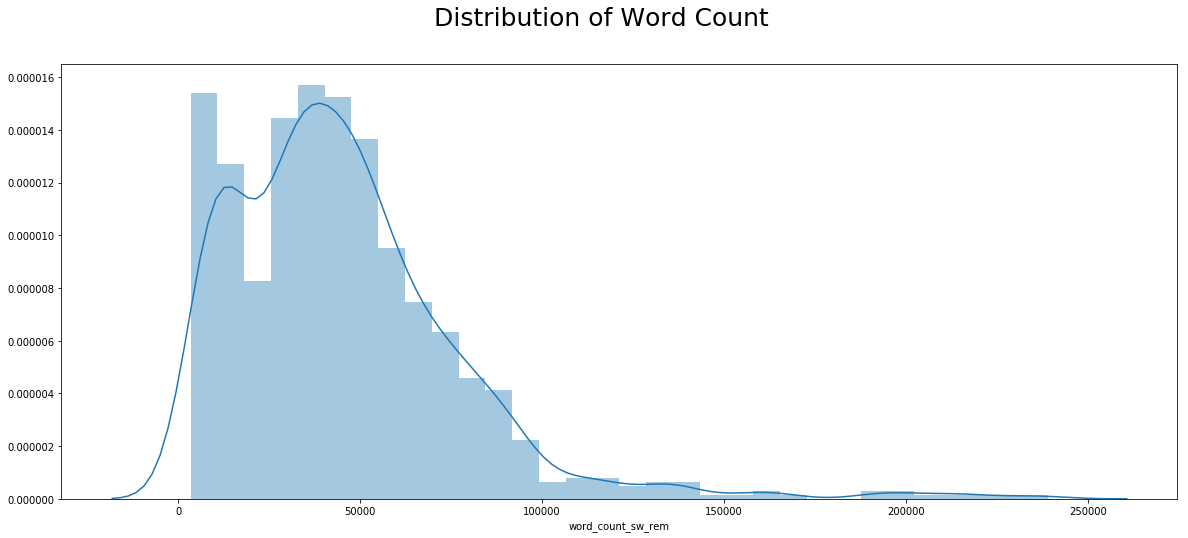

In [40]:
f,ax=plt.subplots(figsize = (20,8))
f.suptitle('Distribution of Word Count', fontsize = 25)
sns.distplot(data['word_count_sw_rem'])

Majority of the word count distribution centers arount 3000 words.

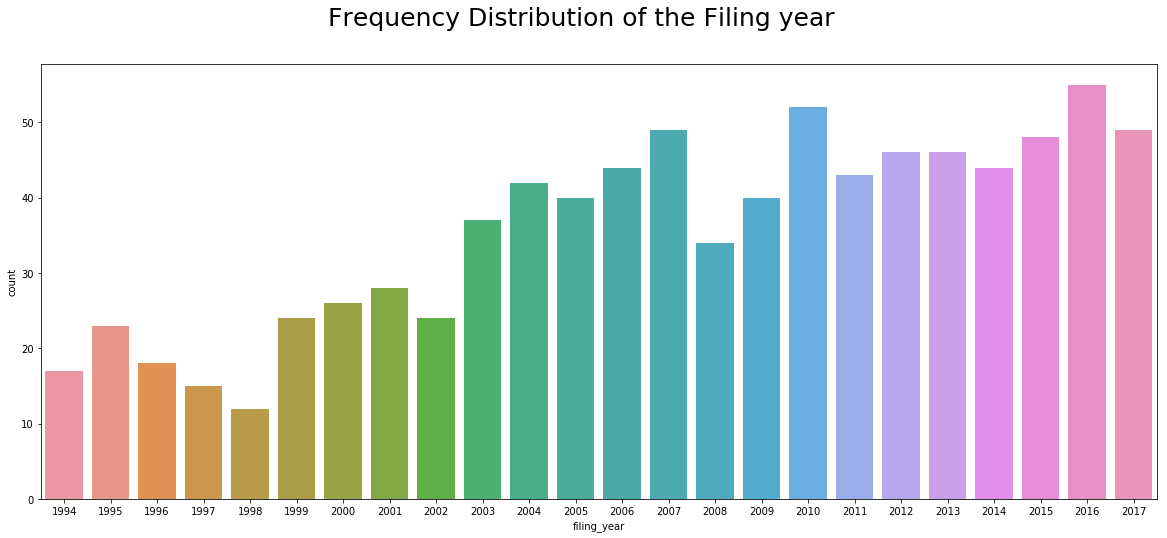

In [41]:
f,ax=plt.subplots(figsize = (20,8))
f.suptitle('Frequency Distribution of the Filing year', fontsize = 25)
sns.countplot(data['filing_year'])

Most 10-K report data is from the years 2008 to 2017.

In [43]:
#f,ax=plt.subplots(figsize = (10,8))
#f.suptitle('Class Imbalance of Target', fontsize = 25)
#sns.countplot(data['long_term_outlook'])

In [44]:
#f,ax=plt.subplots(figsize = (25,10))
#f.suptitle('Frequency Distribution of Filing year with Class label', fontsize = 25)
#sns.countplot(data['filing_year'], hue = data['long_term_outlook'])

The year 2008 shows record maximum of label 0. This is beacause of the 2008 recession.

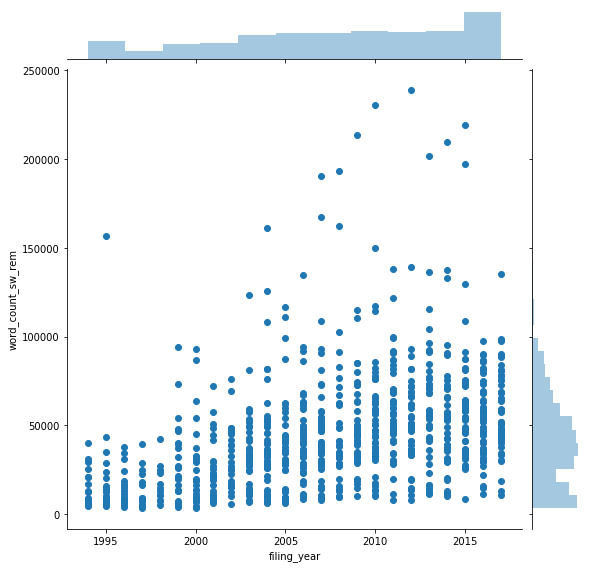

In [45]:
#f,ax=plt.subplots(figsize = (25,10))
f.suptitle('Distribution of filing year with word count', fontsize = 25)
sns.jointplot(x = data['filing_year'], y = data['word_count_sw_rem'], height = 8, ratio = 8)

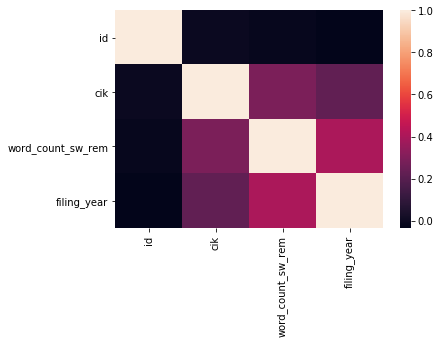

In [46]:
corr = data.corr()

sns.heatmap(corr)

In [ ]:
#f,ax=plt.subplots(figsize = (25,10))
#f.suptitle('Frequency Distribution of Filing year with Class label', fontsize = 25)
#sns.catplot(x="filing_year", y="word_count_sw_rem", hue="long_term_outlook", kind="swarm", data=data, aspect = 3)

In [47]:
from wordcloud import WordCloud

In [48]:
data['lemma'] = [' '.join(text) for text in data['lemma_data']]

In [49]:
data['lemma'][0]

0    TABLE OF CONTENTS UNITED STATES SECURITIES AND...
0    UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
Name: lemma, dtype: object

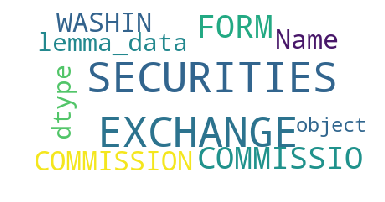

In [50]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(str(data['lemma_data'][10]))
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [52]:
dfTest.dtypes

id                    int64
cik                   int64
filing_date          object
X10k_link            object
tenk_data            object
cleaned_data         object
token_data           object
word_count_token      int64
sw_rem_data          object
word_count_sw_rem     int64
lemma_data           object
filing_year           int64
dtype: object

In [53]:
dfTest['tenk_data'][0]

0     Table of Contents UNITED STATES SECURITIES AN...
0     \t \t UNITED STATES SECURITIES AND EXCHANGE C...
Name: tenk_data, dtype: object

In [54]:
data.to_csv('final_test_data.csv')